In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.utils.fixes import loguniform
%matplotlib notebook

In [2]:
data = pd.read_csv('water_potability.csv')
data.fillna('?', inplace=True)
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,?,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.99097,2.963135,0
1,3.71608,129.422921,18630.057858,6.635246,?,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,?,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,?,392.449580,19.903225,?,2.798243,1
3273,9.41951,175.762646,33155.578218,7.350233,?,432.044783,11.039070,69.8454,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,?,402.883113,11.168946,77.488213,4.708658,1


In [3]:
# use for numerical data, find the avarage for that feature
def find_average(df, key):
    total = 0
    count = 0
    for i in range(len(df[key])):
        if df[key][i] != '?':
            total += df[key][i]
            count += 1

    return total / count

In [4]:
replace = []
# get the value to replace ? for each feature
for key in data.keys():
    replace.append(find_average(data, key))

replace

[7.080794504276819,
 196.36949601730177,
 22014.09252607711,
 7.122276793425787,
 333.7757766108134,
 426.2051106825521,
 14.284970247677336,
 66.39629294676803,
 3.9667861697910576,
 0.3901098901098901]

In [5]:
def impute_missing_data(df, replace):
    for index, key in enumerate(df.keys()):
        df[key].replace(to_replace="?", value=replace[index], inplace=True)

In [6]:
impute_missing_data(data, replace)
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [ ]:
# only have to run once to plot the data
"""
for i in range(10):
    key = data.keys()[i]
    ax = data[key].plot.hist(bins=100, figsize=(8,6), title=key)
    fig = ax.get_figure()
    fig.savefig(key)
    fig.clear()
"""

In [7]:
# split into train test with 80% and 20%
train, test = train_test_split(data, test_size=0.2, random_state=0)
train_x = train.iloc[:, 0:9]
train_y = train.iloc[:, 9:10]
test_x = test.iloc[:, 0:9]
test_y = test.iloc[:, 9:10]

In [8]:
# scale the data 
scaler = StandardScaler()
scaler.fit(train_x)
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [70]:
C_2d_range = [0.01, 0.03, 0.1, 0.3, 1, 3, 10]
linear_accs = []
for c in C_2d_range:
    svclinear = SVC(kernel='linear', C=c, random_state=0)
    svclinear.fit(train_x, train_y.Potability)
    test_linear_pred = svclinear.predict(test_x)
    con = confusion_matrix(test_y, test_linear_pred)
    acc = accuracy_score(test_y, test_linear_pred)
    print(c, acc)
    print(con)
    linear_accs.append(acc)

0.01 0.6280487804878049
[[412   0]
 [244   0]]
0.03 0.6280487804878049
[[412   0]
 [244   0]]
0.1 0.6280487804878049
[[412   0]
 [244   0]]
0.3 0.6280487804878049
[[412   0]
 [244   0]]
1 0.6280487804878049
[[412   0]
 [244   0]]
3 0.6280487804878049
[[412   0]
 [244   0]]
10 0.6280487804878049
[[412   0]
 [244   0]]


<IPython.core.display.Javascript object>


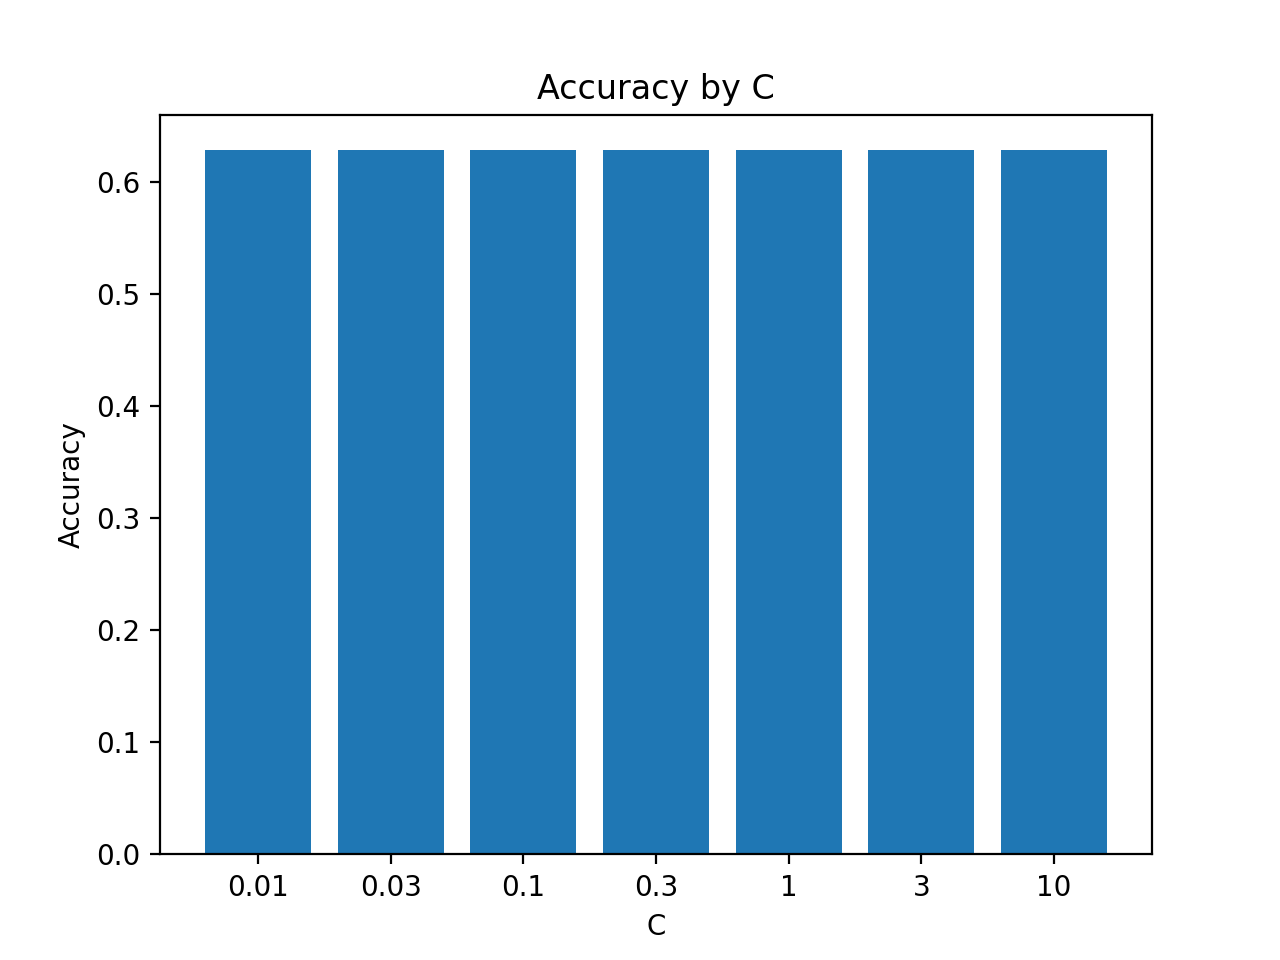

In [76]:
# https://matplotlib.org/stable/gallery/ticks_and_spines/custom_ticker1.html#sphx-glr-gallery-ticks-and-spines-custom-ticker1-py

fig, ax = plt.subplots()
ax.bar([str(c) for c in C_2d_range], linear_accs)
ax.set_title('Accuracy by C')
ax.set_xlabel('C')
ax.set_ylabel('Accuracy')
plt.show()

In [40]:
C_2d_range = [1, 3, 10, 30, 100]
gamma_2d_range = [0.01, 0.03, 0.1, 0.3, 1]
rbf_accs = []
rbf_f1 = []
for c in C_2d_range:
    accs = []
    f1s = []
    for g in gamma_2d_range:
        svcrbf = SVC(kernel='rbf', gamma=g, C=c, random_state=0)
        svcrbf.fit(train_x, train_y.Potability)

        test_rbf_pred = svcrbf.predict(test_x)
        con = confusion_matrix(test_y, test_rbf_pred)
        acc = accuracy_score(test_y, test_rbf_pred)
        f1 = f1_score(test_y, test_rbf_pred)
        print(c, g, acc, f1)
        print(con)
        accs.append(acc)
        f1s.append(f1)
        
    rbf_accs.append(accs)
    rbf_f1.append(f1s)

1 0.01 0.635670731707317 0.06274509803921569
[[409   3]
 [236   8]]
1 0.03 0.6737804878048781 0.27702702702702703
[[401  11]
 [203  41]]
1 0.1 0.6844512195121951 0.3783783783783784
[[386  26]
 [181  63]]
1 0.3 0.6753048780487805 0.432
[[362  50]
 [163  81]]
1 1 0.6189024390243902 0.14383561643835613
[[385  27]
 [223  21]]
3 0.01 0.6692073170731707 0.24390243902439024
[[404   8]
 [209  35]]
3 0.03 0.6798780487804879 0.34375
[[391  21]
 [189  55]]
3 0.1 0.6814024390243902 0.4305177111716622
[[368  44]
 [165  79]]
3 0.3 0.6661585365853658 0.4988558352402746
[[328  84]
 [135 109]]
3 1 0.6112804878048781 0.2776203966005666
[[352  60]
 [195  49]]
10 0.01 0.6722560975609756 0.29042904290429045
[[397  15]
 [200  44]]
10 0.03 0.6814024390243902 0.3798219584569733
[[383  29]
 [180  64]]
10 0.1 0.6783536585365854 0.47117794486215536
[[351  61]
 [150  94]]
10 0.3 0.6341463414634146 0.4893617021276596
[[301 111]
 [129 115]]
10 1 0.6051829268292683 0.26628895184135976
[[350  62]
 [197  47]]
30 0.01 

In [41]:
rbf_accs

[[0.635670731707317,
  0.6737804878048781,
  0.6844512195121951,
  0.6753048780487805,
  0.6189024390243902],
 [0.6692073170731707,
  0.6798780487804879,
  0.6814024390243902,
  0.6661585365853658,
  0.6112804878048781],
 [0.6722560975609756,
  0.6814024390243902,
  0.6783536585365854,
  0.6341463414634146,
  0.6051829268292683],
 [0.6753048780487805,
  0.6951219512195121,
  0.6600609756097561,
  0.635670731707317,
  0.6051829268292683],
 [0.6798780487804879,
  0.6829268292682927,
  0.6509146341463414,
  0.625,
  0.6051829268292683]]

<IPython.core.display.Javascript object>


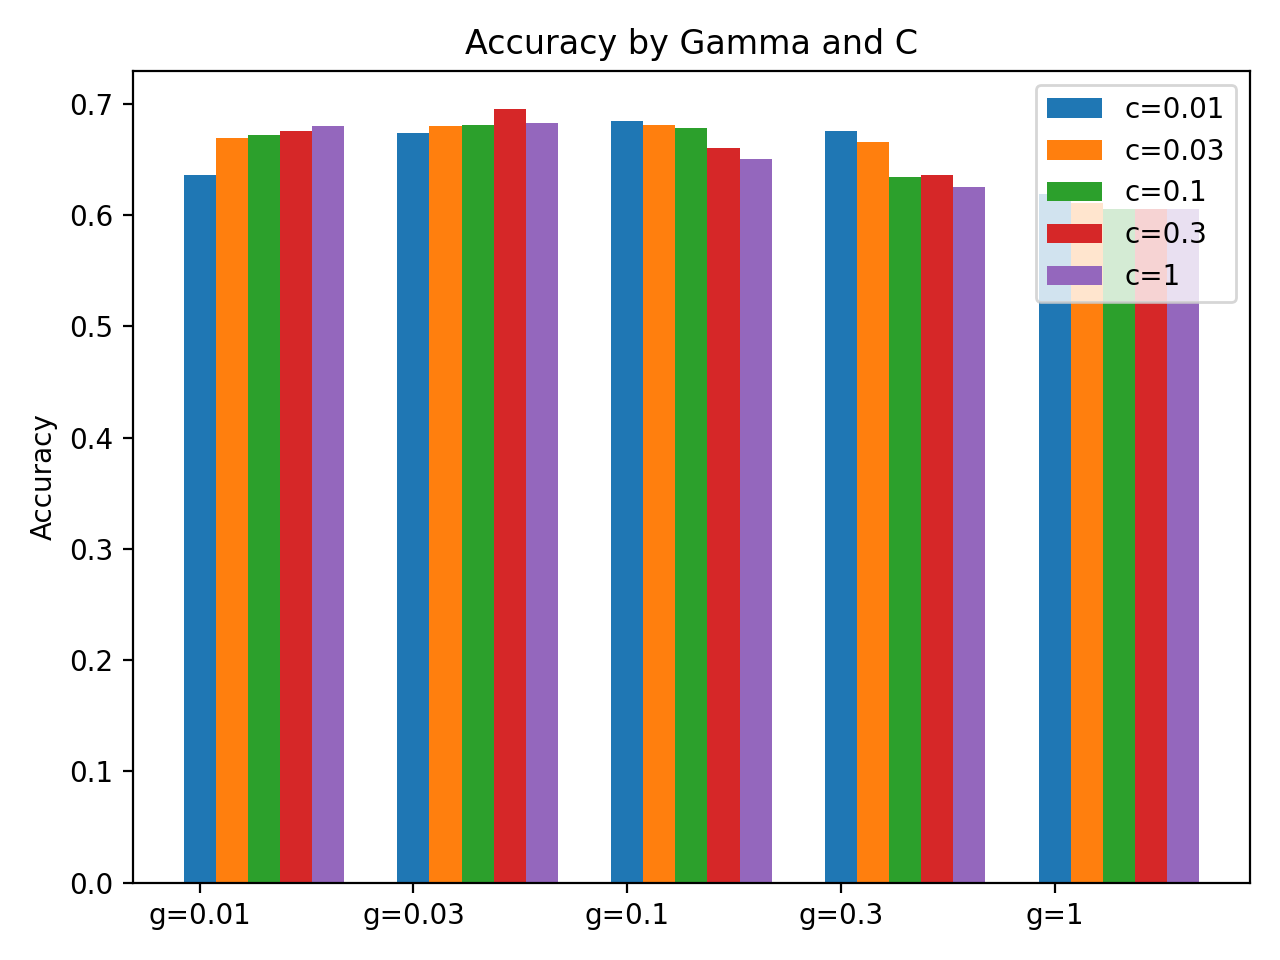

In [77]:
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

# C_2d_range = [1, 3, 10, 30, 100]
# gamma_2d_range = [0.01, 0.03, 0.1, 0.3, 1]
x_labels = ['g='+str(x) for x in gamma_2d_range]
top_labels = ['c='+str(x) for x in C_2d_range]
data = rbf_accs

x = np.arange(len(labels))  # the label locations
width = 0.15

fig, ax = plt.subplots()
rects1 = ax.bar(x + 0, data[0], width, label=top_labels[0])
rects2 = ax.bar(x + 0.15, data[1], width, label=top_labels[1])
rects3 = ax.bar(x + 0.3, data[2], width, label=top_labels[2])
rects4 = ax.bar(x + 0.45, data[3], width, label=top_labels[3])
rects5 = ax.bar(x + 0.6, data[4], width, label=top_labels[4])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by Gamma and C')
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.legend()

fig.tight_layout()

plt.show()

<IPython.core.display.Javascript object>


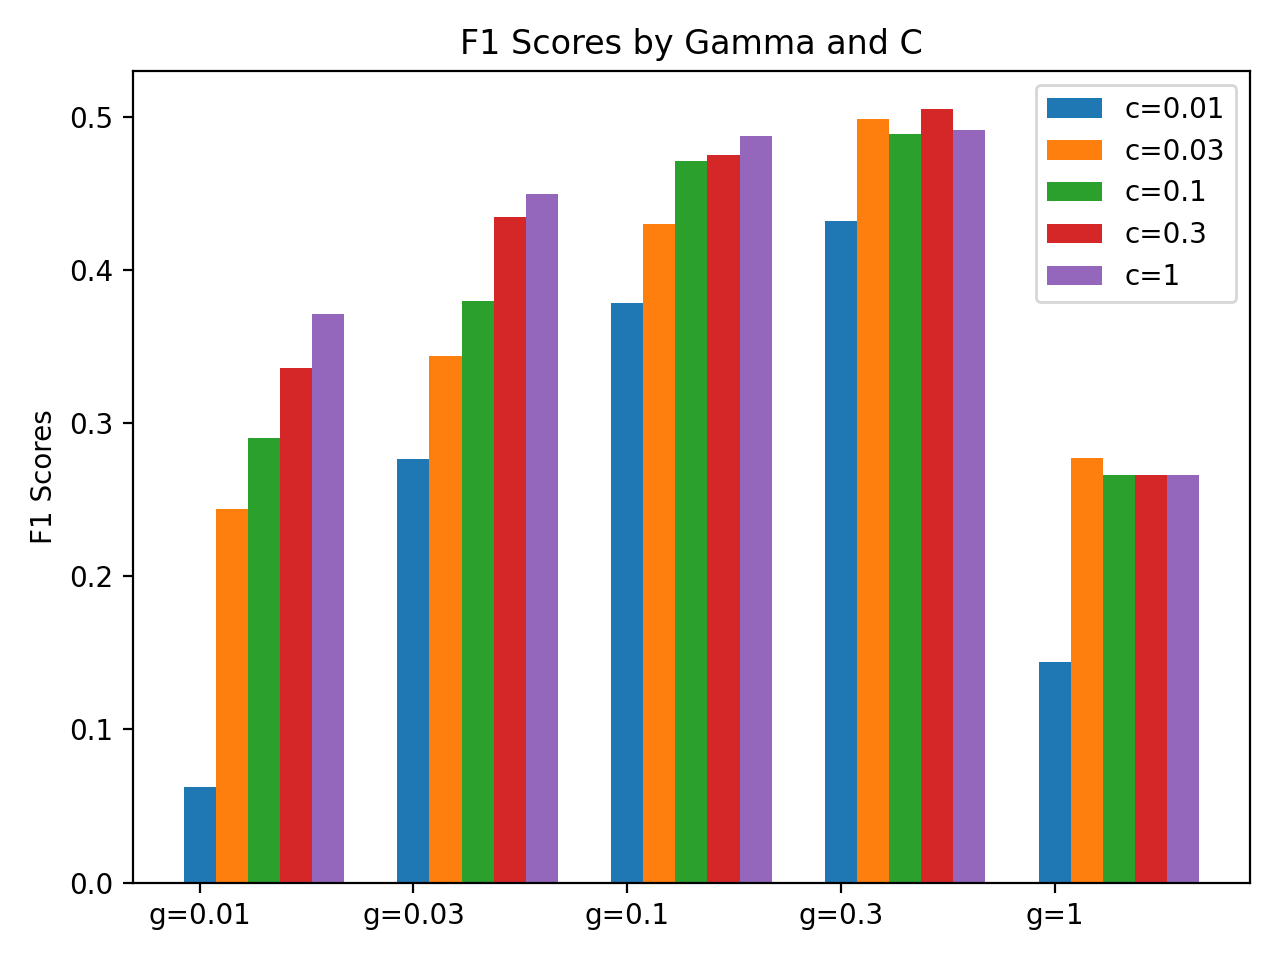

In [78]:
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

# C_2d_range = [1, 3, 10, 30, 100]
# gamma_2d_range = [0.01, 0.03, 0.1, 0.3, 1]
x_labels = ['g='+str(x) for x in gamma_2d_range]
top_labels = ['c='+str(x) for x in C_2d_range]
data = rbf_f1

x = np.arange(len(labels))  # the label locations
width = 0.15

fig, ax = plt.subplots()
rects1 = ax.bar(x + 0, data[0], width, label=top_labels[0])
rects2 = ax.bar(x + 0.15, data[1], width, label=top_labels[1])
rects3 = ax.bar(x + 0.3, data[2], width, label=top_labels[2])
rects4 = ax.bar(x + 0.45, data[3], width, label=top_labels[3])
rects5 = ax.bar(x + 0.6, data[4], width, label=top_labels[4])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('F1 Scores')
ax.set_title('F1 Scores by Gamma and C')
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.legend()

fig.tight_layout()

plt.show()